In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv(r"C:\Users\homel\Downloads\blood_pressure_data.csv")

In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
df['Unnamed: 0'] = pd.to_datetime(df['Unnamed: 0'])

In [ ]:
df.set_index('Unnamed: 0', inplace=True)

In [ ]:
df_agg = df.resample('1H').mean()

C:\Users\homel\AppData\Local\Temp\ipykernel_20736\2391547723.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_agg = df.resample('1H').mean()


In [ ]:
df_filled = df_agg.interpolate(method='linear')

In [ ]:
df_plot_mpl = df_filled.copy()

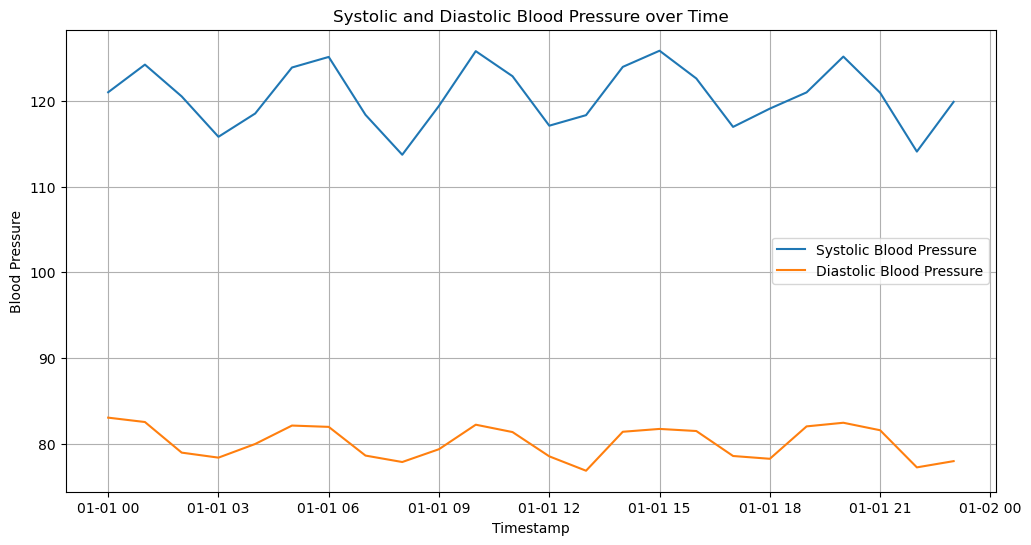

In [ ]:
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.plot(df_plot_mpl.index, df_plot_mpl['systolic_bp'], label='Systolic Blood Pressure')
plt.plot(df_plot_mpl.index, df_plot_mpl['diastolic_bp'], label='Diastolic Blood Pressure')

plt.title('Systolic and Diastolic Blood Pressure over Time')
plt.xlabel('Timestamp')
plt.ylabel('Blood Pressure')
plt.legend()
plt.grid(True)
plt.show()

DTW Distance: 1243.0206279370238


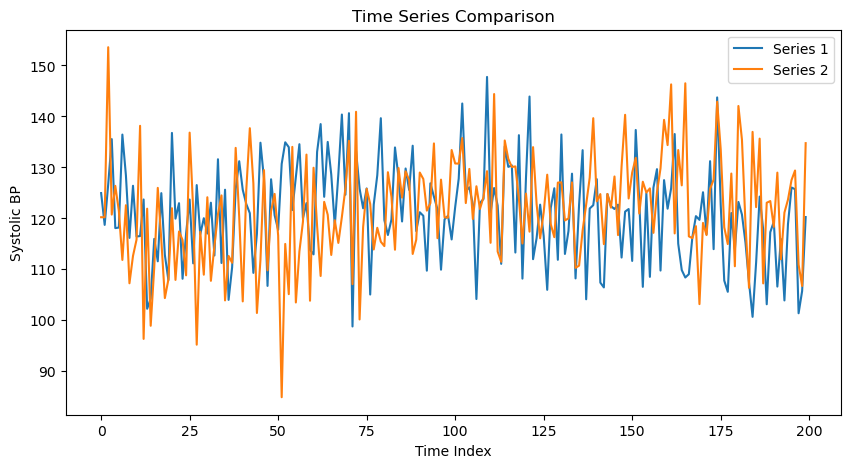

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = r"C:\Users\homel\Downloads\blood_pressure_data.csv"  # Update with your actual file path
df = pd.read_csv(file_path)

# Drop rows with missing values
df_clean = df.dropna(subset=["systolic_bp"]).reset_index(drop=True)

# Extract systolic BP time series
systolic_series = df_clean["systolic_bp"].values

# Select two sample subsequences for DTW comparison
series1 = systolic_series[:200]  # First 200 readings
series2 = systolic_series[200:400]  # Next 200 readings

def dynamic_time_warping(series1, series2):
    """
    Compute the DTW distance between two time series using dynamic programming.
    """
    n, m = len(series1), len(series2)
    dtw_matrix = np.full((n + 1, m + 1), np.inf)
    dtw_matrix[0, 0] = 0

    for i in range(1, n + 1):
        for j in range(1, m + 1):
            cost = abs(series1[i - 1] - series2[j - 1])
            dtw_matrix[i, j] = cost + min(
                dtw_matrix[i - 1, j],    # Insertion
                dtw_matrix[i, j - 1],    # Deletion
                dtw_matrix[i - 1, j - 1] # Match
            )

    return dtw_matrix[n, m]

# Compute DTW distance
dtw_distance = dynamic_time_warping(series1, series2)
print(f"DTW Distance: {dtw_distance}")

# Plot the time series
plt.figure(figsize=(10, 5))
plt.plot(series1, label='Series 1')
plt.plot(series2, label='Series 2')
plt.legend()
plt.title('Time Series Comparison')
plt.xlabel('Time Index')
plt.ylabel('Systolic BP')
plt.show()

DTW Distance: 1243.0206279370238


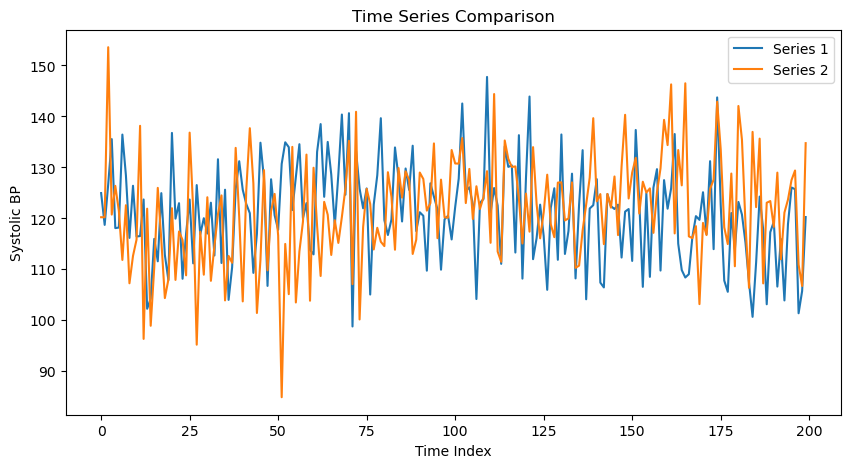

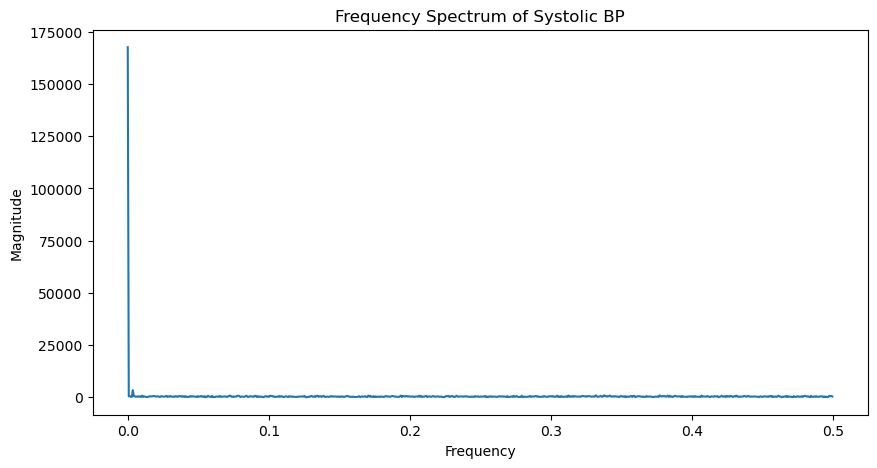

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fftpack import fft

# Load the dataset
file_path = r"C:\Users\homel\Downloads\blood_pressure_data.csv"
df = pd.read_csv(file_path)

# Drop rows with missing values
df_clean = df.dropna(subset=["systolic_bp"]).reset_index(drop=True)

# Extract systolic BP time series
systolic_series = df_clean["systolic_bp"].values

# Select two sample subsequences for DTW comparison
series1 = systolic_series[:200]  # First 200 readings
series2 = systolic_series[200:400]  # Next 200 readings

def dynamic_time_warping(series1, series2):
    """
    Compute the DTW distance between two time series using dynamic programming.
    """
    n, m = len(series1), len(series2)
    dtw_matrix = np.full((n + 1, m + 1), np.inf)
    dtw_matrix[0, 0] = 0

    for i in range(1, n + 1):
        for j in range(1, m + 1):
            cost = abs(series1[i - 1] - series2[j - 1])
            dtw_matrix[i, j] = cost + min(
                dtw_matrix[i - 1, j],    # Insertion
                dtw_matrix[i, j - 1],    # Deletion
                dtw_matrix[i - 1, j - 1] # Match
            )

    return dtw_matrix[n, m]

# Compute DTW distance
dtw_distance = dynamic_time_warping(series1, series2)
print(f"DTW Distance: {dtw_distance}")

# Plot the time series
plt.figure(figsize=(10, 5))
plt.plot(series1, label='Series 1')
plt.plot(series2, label='Series 2')
plt.legend()
plt.title('Time Series Comparison')
plt.xlabel('Time Index')
plt.ylabel('Systolic BP')
plt.show()

# Fourier Transform (FFT) to extract frequency domain features
fft_values = fft(systolic_series)
frequencies = np.fft.fftfreq(len(systolic_series))

# Plot FFT spectrum
plt.figure(figsize=(10, 5))
plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_values)[:len(frequencies)//2])
plt.title('Frequency Spectrum of Systolic BP')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.show()

DTW Distance: 1243.0206279370238


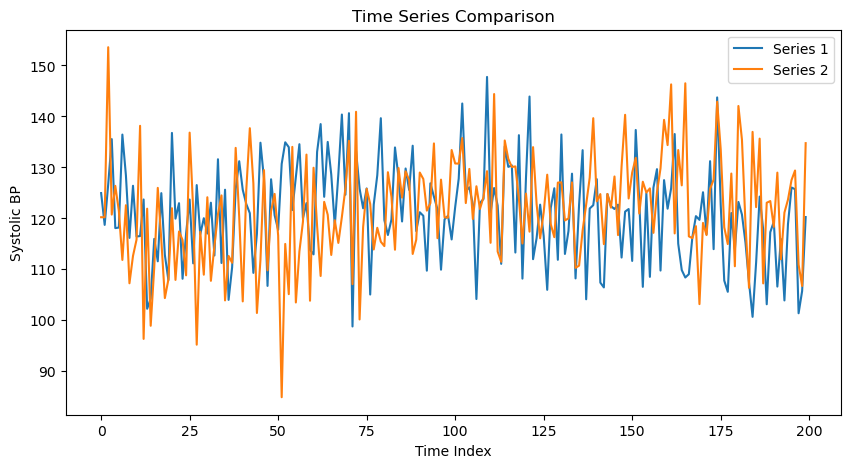

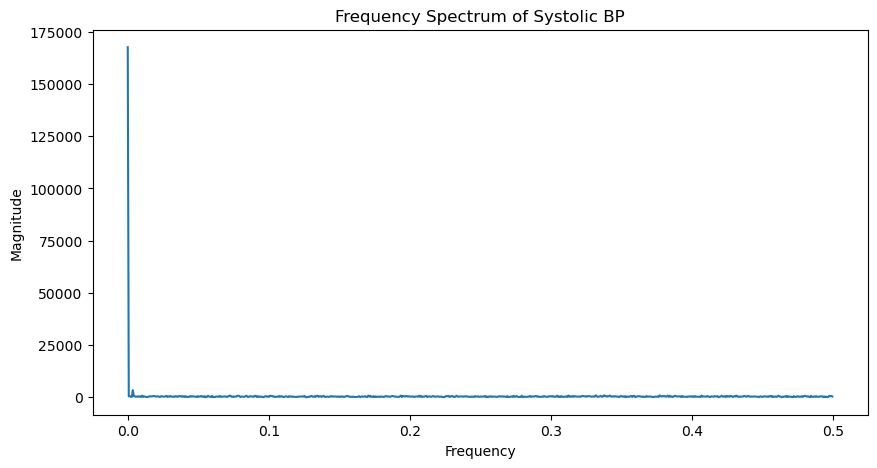

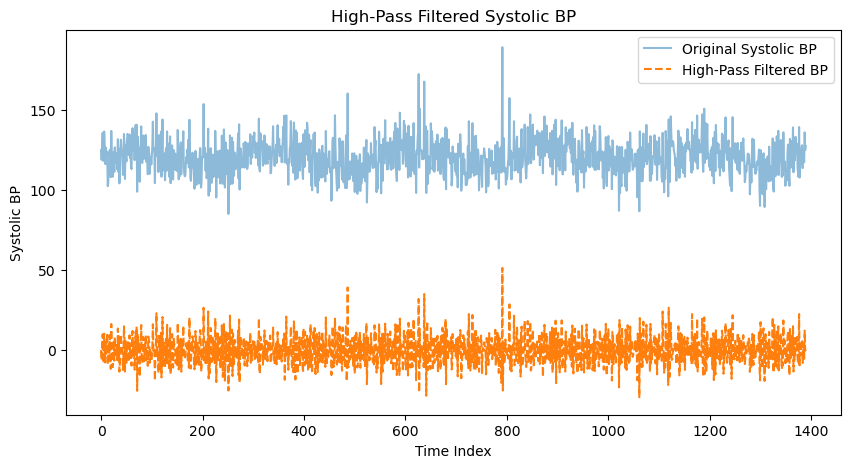

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy.signal import butter, filtfilt

# Load the dataset
file_path = r"C:\Users\homel\Downloads\blood_pressure_data.csv"
df = pd.read_csv(file_path)

# Drop rows with missing values
df_clean = df.dropna(subset=["systolic_bp"]).reset_index(drop=True)

# Extract systolic BP time series
systolic_series = df_clean["systolic_bp"].values

# Select two sample subsequences for DTW comparison
series1 = systolic_series[:200]  # First 200 readings
series2 = systolic_series[200:400]  # Next 200 readings

def dynamic_time_warping(series1, series2):
    """
    Compute the DTW distance between two time series using dynamic programming.
    """
    n, m = len(series1), len(series2)
    dtw_matrix = np.full((n + 1, m + 1), np.inf)
    dtw_matrix[0, 0] = 0

    for i in range(1, n + 1):
        for j in range(1, m + 1):
            cost = abs(series1[i - 1] - series2[j - 1])
            dtw_matrix[i, j] = cost + min(
                dtw_matrix[i - 1, j],    # Insertion
                dtw_matrix[i, j - 1],    # Deletion
                dtw_matrix[i - 1, j - 1] # Match
            )

    return dtw_matrix[n, m]

# Compute DTW distance
dtw_distance = dynamic_time_warping(series1, series2)
print(f"DTW Distance: {dtw_distance}")

# Plot the time series
plt.figure(figsize=(10, 5))
plt.plot(series1, label='Series 1')
plt.plot(series2, label='Series 2')
plt.legend()
plt.title('Time Series Comparison')
plt.xlabel('Time Index')
plt.ylabel('Systolic BP')
plt.show()

# Fourier Transform (FFT) to extract frequency domain features
fft_values = fft(systolic_series)
frequencies = np.fft.fftfreq(len(systolic_series))

# Plot FFT spectrum
plt.figure(figsize=(10, 5))
plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_values)[:len(frequencies)//2])
plt.title('Frequency Spectrum of Systolic BP')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.show()

# High-pass filtering to remove slow trends
def high_pass_filter(data, cutoff=0.1, fs=1.0, order=5):
    """
    Apply a Butterworth high-pass filter to remove slow variations.
    """
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    filtered_data = filtfilt(b, a, data)
    return filtered_data

# Apply high-pass filter to systolic BP data
filtered_series = high_pass_filter(systolic_series)

# Plot original vs filtered data
plt.figure(figsize=(10, 5))
plt.plot(systolic_series, label='Original Systolic BP', alpha=0.5)
plt.plot(filtered_series, label='High-Pass Filtered BP', linestyle='dashed')
plt.legend()
plt.title('High-Pass Filtered Systolic BP')
plt.xlabel('Time Index')
plt.ylabel('Systolic BP')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy.signal import butter, filtfilt

# Load the dataset
file_path = r"C:\Users\homel\Downloads\blood_pressure_data.csv"
df = pd.read_csv(file_path)

# Drop rows with missing values
df_clean = df.dropna(subset=["systolic_bp"]).reset_index(drop=True)

# Extract systolic BP time series
systolic_series = df_clean["systolic_bp"].values

# Select two sample subsequences for DTW comparison
series1 = systolic_series[:200]  # First 200 readings
series2 = systolic_series[200:400]  # Next 200 readings

def dynamic_time_warping(series1, series2):
    """
    Compute the DTW distance between two time series using dynamic programming.
    """
    n, m = len(series1), len(series2)
    dtw_matrix = np.full((n + 1, m + 1), np.inf)
    dtw_matrix[0, 0] = 0

    for i in range(1, n + 1):
        for j in range(1, m + 1):
            cost = abs(series1[i - 1] - series2[j - 1])
            dtw_matrix[i, j] = cost + min(
                dtw_matrix[i - 1, j],    # Insertion
                dtw_matrix[i, j - 1],    # Deletion
                dtw_matrix[i - 1, j - 1] # Match
            )

    return dtw_matrix[n, m]

# Compute DTW distance
#plt.show()

# Fourier Transform (FFT) to extract frequency domain features
fft_values = fft(systolic_series)
frequencies = np.fft.fftfreq(len(systolic_series))

# Calculate statistical features
mean_bp = np.mean(systolic_series)
variance_bp = np.var(systolic_series)
std_dev_bp = np.std(systolic_series)
skewness_bp = pd.Series(systolic_series).skew()
kurtosis_bp = pd.Series(systolic_series).kurt()

# Print statistical features
print(f"Mean: {mean_bp}")
print(f"Variance: {variance_bp}")
print(f"Standard Deviation: {std_dev_bp}")
print(f"Skewness: {skewness_bp}")
print(f"Kurtosis: {kurtosis_bp}")

Mean: 120.59770191764102
Variance: 118.91662454953166
Standard Deviation: 10.904889937524892
Skewness: 0.3379825457919583
Kurtosis: 1.4939076571135348
